In [ ]:
# default_exp module17

# Import

In [ ]:
# export
import numpy as np
import matplotlib.pyplot as plt

from cs371.utils import *

# Binary Tree

In [ ]:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.L, self.R = None, None

In [ ]:
class BinaryTree:
    def __init__(self):
        self.root = None
        
    def _draw(self, node, x, y, step_x, step_y):
        plt.plot(x, y)
        plt.text(x, y, str(node.val))
        if node.L:
            plt.plot([x, x-step_x], [y, y+step_y], '-r')
            self._draw(node.L, x-step_x, y+step_y, step_x/2, step_y)
        if node.R: 
            plt.plot([x, x+step_x], [y, y+step_y], '-r')
            self._draw(node.R, x+step_x, y+step_y, step_x/2, step_y)
    
    def draw(self):
        if self.root:
            self._draw(self.root, 0, 0, 1, -1)
    
    def _inorder(self, node):
        if node.L: self._inorder(node.L)
        print(node.val)
        if node.R: self._inorder(node.R)
    
    def inorder(self):
        if self.root: self._inorder(self.root)
            
    def _add(self, node, val):
        if val < node.val:
            if node.L: self._add(node.L, val)
            else:      node.L = TreeNode(val)
        else:
            if node.R: self._add(node.R, val)
            else:      node.R = TreeNode(val)
            
    def add(self, val):
        if self.root: 
            self._add(self.root, val)
        else:
            self.root = TreeNode(val)
            
    def _get_max(self, node):
        if node.R: return self._get_max(node.R)
        else:      return node.val
         
    def _remove(self, node, val):
        if val < node.val: # Check left subtree
            if node.L:
                if node.L.val == val:
                    if node.L.L and node.L.R:
                        val_max = self._get_max(node.L.L)
                        self._remove(node.L, val_max)
                        node.L.val = val_max                        
                    elif node.L.L: node.L = node.L.L
                    elif node.L.R: node.L = node.L.R
                    else:          node.L = None
                else:
                    self._remove(node.L, val)
        else:              # Check right subtree
            if node.R:
                if node.R.val == val:
                    if node.R.L and node.R.R:
                        val_max = self._get_max(node.R.L)
                        self._remove(node.R, val_max)
                        node.R.val = val_max   
                    elif node.R.L: node.R = node.R.L
                    elif node.R.R: node.R = node.R.R
                    else:          node.R = None
                        
                else:
                    self._remove(node.R, val)        
    
    def remove(self, val):
        if self.root:
            if self.root.val == val:
                if self.root.L and self.root.R:
                    val_max = self._get_max(self.root.L)
                    self._remove(self.root, val_max)
                    self.root.val = val_max                        
                elif self.root.L: self.root = self.root.L
                elif self.root.R: self.root = self.root.R
                else:             self.root = None
            else:                
                self._remove(self.root, val)

In [ ]:
ten     = TreeNode(10)
seven   = TreeNode(7)
fifteen = TreeNode(15)
three   = TreeNode(3)
twelve  = TreeNode(12)
twenty  = TreeNode(20)

In [ ]:
tree = BinaryTree()

In [ ]:
tree.root = ten
ten.L     = seven
ten.R     = fifteen
seven.L   = three
fifteen.L = twelve
fifteen.R = twenty

In [ ]:
def traverse(node):
    if node.L:
        traverse(node.L)
    print(node.val)
    if node.R:
        traverse(node.R)

In [ ]:
traverse(tree.root)

3
7
10
12
15
20


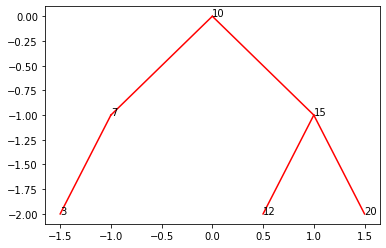

In [ ]:
tree.draw()

# Binary Search Tree

In [ ]:
tree.inorder()

3
7
10
12
15
20


## BST Add/Remove

In [ ]:
tree = BinaryTree()

In [ ]:
tree.add(10)
tree.add(7)
tree.add(15)
tree.add(3)
tree.add(12)
tree.add(20)

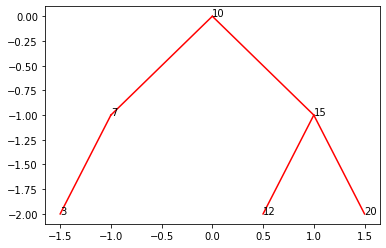

In [ ]:
tree.draw()

In [ ]:
tree.inorder()

3
7
10
12
15
20


In [ ]:
tree.remove(15)

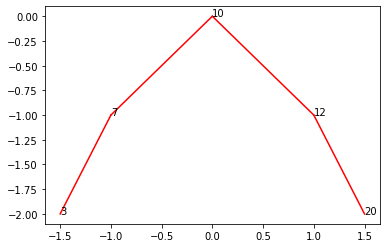

In [ ]:
tree.draw()

In [ ]:
tree.remove(10)

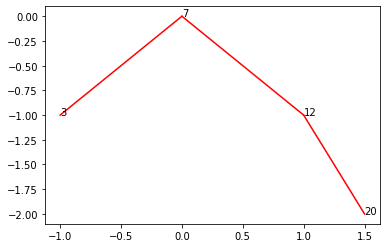

In [ ]:
tree.draw()

In [ ]:
tree.remove(20)

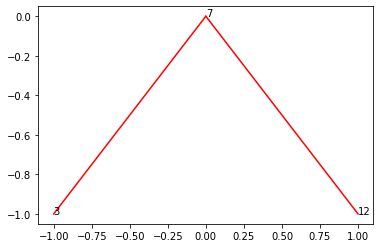

In [ ]:
tree.draw()

# Retry using Node methods, returning the node itself makes the program a lot easier to write and IMO underratedly profound...

In [ ]:
# export
class TreeNode:
    def __init__(self, key, val, L=None, R=None):
        self.key, self.val, self.L, self.R = key, val, L, R
    
    def newnode(self, key, val):
        return TreeNode(key, val)
    
    def add(self, key, val):
        if key == self.key: self.val = val
        elif key < self.key:
            if self.L:      self.L = self.L.add(key, val)
            else:           self.L = self.newnode(key, val)
        elif key > self.key:
            if self.R:      self.R = self.R.add(key, val)
            else:           self.R = self.newnode(key, val)
        return self
    
    def _max(self):
        if self.R: return self.R._max()
        else:      return self
        
    def _swap(self, other):
        self.key, self.val, other.key, other.val = other.key, other.val, self.key, self.val
        
    def remove(self, key):
        if key == self.key:
            if self.L and self.R:
                self._swap(self.L._max())
                self.L = self.L.remove(key)
            elif self.L: return self.L
            elif self.R: return self.R
            else:        return None
        elif key < self.key:
            if self.L:      self.L = self.L.remove(key)
        elif key > self.key:
            if self.R:      self.R = self.R.remove(key)
        return self
    
    def draw(self, x, y, delta_x, delta_y):
        plt.text(x, y, f'{self.key} - {self.val}')
        if self.L: 
            plt.plot([x, x-delta_x], [y, y-delta_y], '-r')
            self.L.draw(x-delta_x, y-delta_y, delta_x/2, delta_y)
        if self.R: 
            plt.plot([x, x+delta_x], [y, y-delta_y], '-r')
            self.R.draw(x+delta_x, y-delta_y, delta_x/2, delta_y)
    
    def inorder(self):
        if self.L:
            self.L.inorder()
        print(f'{self.key} - {self.val}')
        if self.R:
            self.R.inorder()
            
    def __repr__(self):
        return f'{self.key} - {self.val}'

In [ ]:
node1 = TreeNode(10, 'justin1')
node2 = TreeNode(7,  'justin2')

In [ ]:
node1._swap(node2)
node1.key, node1.val, node2.key, node2.val

(7, 'justin2', 10, 'justin1')

In [ ]:
node1 = TreeNode(10, 'justin1')
node1 = node1.add(7,  'justin2')
node1 = node1.add(15, 'justin3')
node1.L.val, node1.R.val

('justin2', 'justin3')

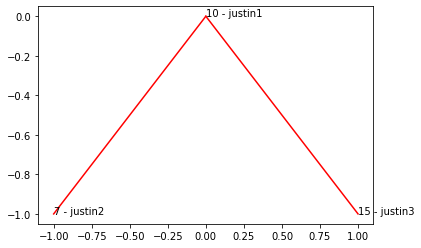

In [ ]:
node1.draw(0, 0, 1, 1)

In [ ]:
node1.inorder()

7 - justin2
10 - justin1
15 - justin3


In [ ]:
node1 = node1.remove(10)

In [ ]:
node1.val, node1.R.val

('justin2', 'justin3')

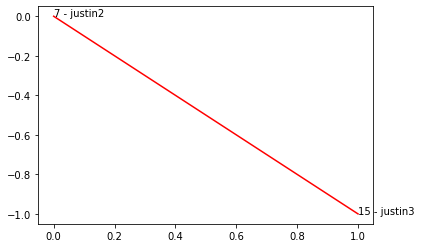

In [ ]:
node1.draw(0, 0, 1, 1)

In [ ]:
# export
class BinaryTree:
    def __init__(self, root=None):
        self.root = root
        
    def add(self, key, val):
        if self.root: self.root = self.root.add(key, val)
        else:         self.root = TreeNode(key, val)
    
    def remove(self, key):
        if self.root: self.root = self.root.remove(key)
    
    def draw(self):
        if self.root: self.root.draw(0, 0, 1, 1)
            
    def inorder(self):
        if self.root: self.root.inorder()

In [ ]:
tree = BinaryTree()

In [ ]:
tree.add(10, 'justin1')
tree.add(7,  'justin2')
tree.add(14, 'justin3')

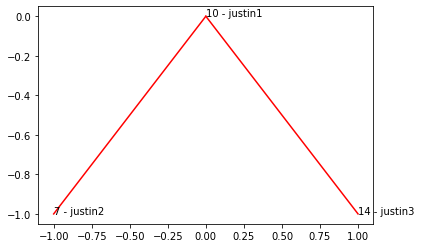

In [ ]:
tree.draw()

In [ ]:
tree.remove(10)

In [ ]:
tree.root.val, tree.root.R.val

('justin2', 'justin3')

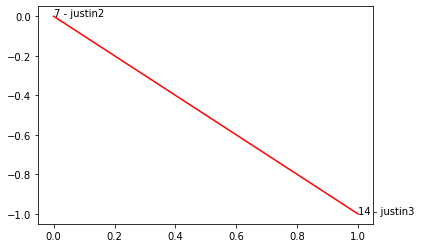

In [ ]:
tree.draw()

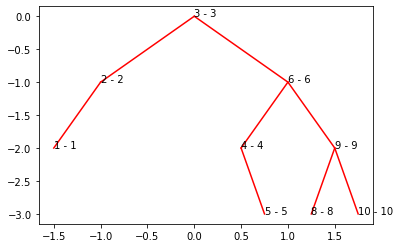

In [ ]:
tree = BinaryTree()
for i in [3,2,1,6,4,5,9,8,10]:
    tree.add(i, i)
tree.draw()

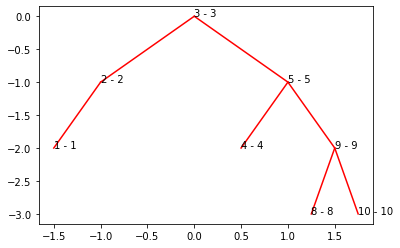

In [ ]:
tree.remove(6)
tree.draw()

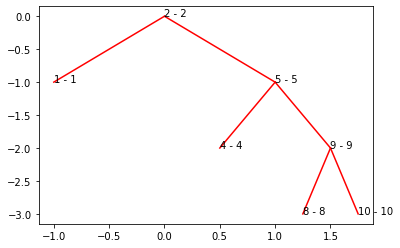

In [ ]:
tree.remove(3)
tree.draw()

Placing the methods on nodes makes things a LOT easier, especially the `removal` method

In [ ]:
tree.inorder()

1 - 1
2 - 2
4 - 4
5 - 5
8 - 8
9 - 9
10 - 10


Might be nice to maintain all inputs are nodes and all outputs are nodes for TreeNode methods

# Balanced binary search tree

Try tree rotations

In [ ]:
# export
def _rotate_left(self):
    R, R_L = self.R, None
    if R: R_L, self.R.L = self.R.L, self
    self.R = R_L
    return R

In [ ]:
# export
TreeNode._rotate_left = _rotate_left

In [ ]:
# export
def _rotate_right(self):
    L, L_R = self.L, None
    if L: L_R, self.L.R = self.L.R, self
    self.L = L_R
    return L

In [ ]:
# export
TreeNode._rotate_right = _rotate_right

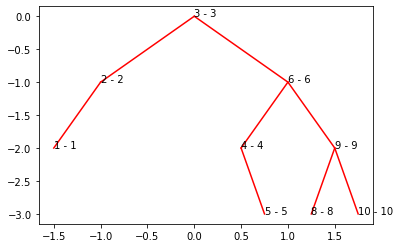

In [ ]:
tree = BinaryTree()
for i in [3,2,1,6,4,5,9,8,10]:
    tree.add(i, i)
tree.draw()

In [ ]:
tree.inorder()

1 - 1
2 - 2
3 - 3
4 - 4
5 - 5
6 - 6
8 - 8
9 - 9
10 - 10


In [ ]:
tree.root = tree.root._rotate_left()

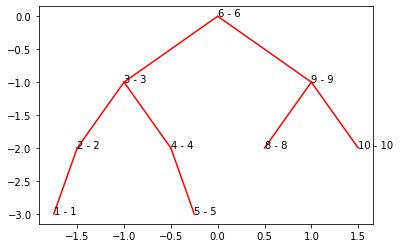

In [ ]:
tree.draw()

In [ ]:
tree.inorder()

1 - 1
2 - 2
3 - 3
4 - 4
5 - 5
6 - 6
8 - 8
9 - 9
10 - 10


In [ ]:
tree.root = tree.root._rotate_right()

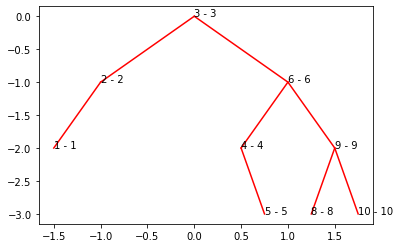

In [ ]:
tree.draw()

In [ ]:
tree.inorder()

1 - 1
2 - 2
3 - 3
4 - 4
5 - 5
6 - 6
8 - 8
9 - 9
10 - 10


Try height balanced tree; for now just compute height on demand but this should be cached

In [ ]:
# export
def _height(self):
    height_L = self.L._height() if self.L else 0
    height_R = self.R._height() if self.R else 0
    return max(height_L, height_R) + 1

In [ ]:
# export
TreeNode._height = _height

In [ ]:
# export
def height(node):
    return node._height() if node else 0

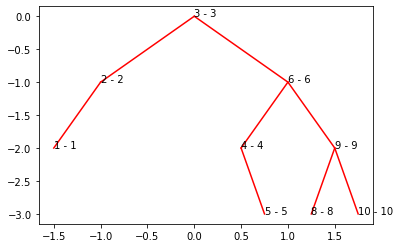

In [ ]:
tree.draw()

In [ ]:
height(tree.root)

4

In [ ]:
tree.root._height()

4

In [ ]:
tree.root.L._height()

2

In [ ]:
tree.root.R._height()

3

In [ ]:
# export
def _balance(self):
    return height(self.R) - height(self.L)

In [ ]:
# export
TreeNode._balance = _balance

In [ ]:
# export
def balance(node):
    return node._balance() if node else 0

In [ ]:
balance(tree.root)

1

Rebalance is hard to understand

In [ ]:
# export
def _rebalance(self):
    bal = self._balance()
    if   bal == -2:
        if balance(self.L) > 0:
            self.L = self.L._rotate_left()
        self = self._rotate_right()
    elif bal ==  2:
        if balance(self.R) < 0:
            self.R = self.R._rotate_right()
        self = self._rotate_left()
    return self

In [ ]:
# export
TreeNode._rebalance = _rebalance

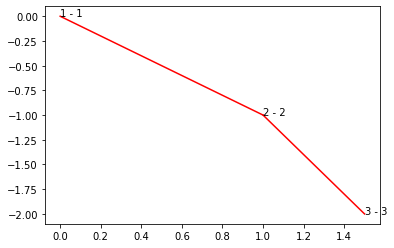

In [ ]:
tree = BinaryTree()
for i in [1,2,3]: tree.add(i, i)
tree.draw()

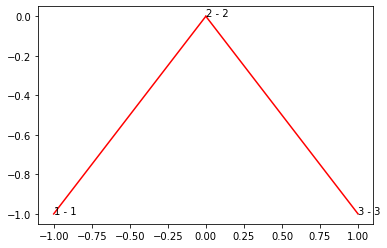

In [ ]:
tree.root = tree.root._rebalance()
tree.draw()

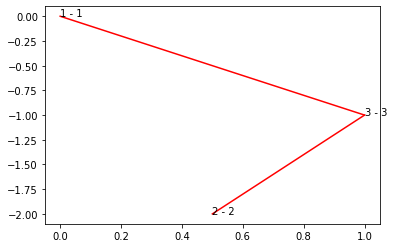

In [ ]:
tree = BinaryTree()
for i in [1,3,2]: tree.add(i, i)
tree.draw()

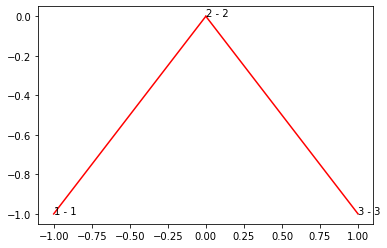

In [ ]:
tree.root = tree.root._rebalance()
tree.draw()

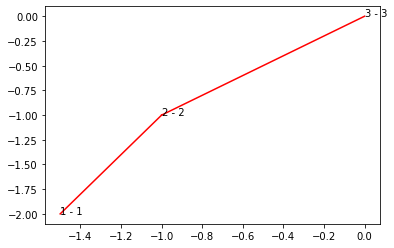

In [ ]:
tree = BinaryTree()
for i in [3,2,1]: tree.add(i, i)
tree.draw()

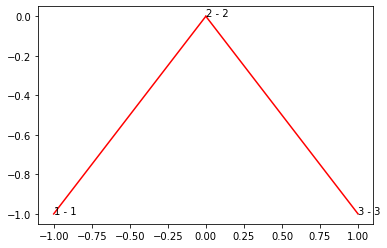

In [ ]:
tree.root = tree.root._rebalance()
tree.draw()

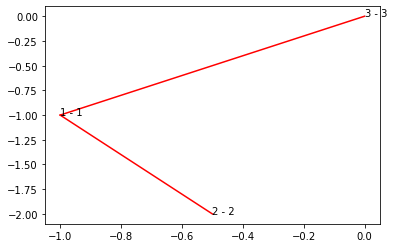

In [ ]:
tree = BinaryTree()
for i in [3,1,2]: tree.add(i, i)
tree.draw()

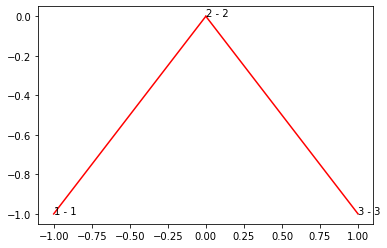

In [ ]:
tree.root = tree.root._rebalance()
tree.draw()

In [ ]:
def add_avl(self, key, val):
    if key == self.key: self.val = val
    elif key < self.key:
        if self.L:      self.L = self.L.add_avl(key, val)
        else:           self.L = TreeNode(key, val)
    elif key > self.key:
        if self.R:      self.R = self.R.add_avl(key, val)
        else:           self.R = TreeNode(key, val)
    return self._rebalance()

In [ ]:
TreeNode.add_avl = add_avl

In [ ]:
def add_avl(self, key, val):
    if self.root: self.root = self.root.add_avl(key, val)
    else:         self.root = TreeNode(key, val)

In [ ]:
BinaryTree.add_avl = add_avl

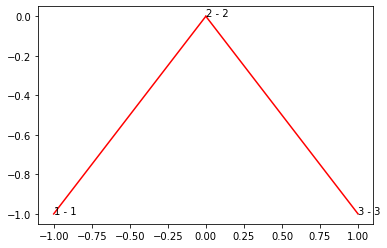

In [ ]:
tree = BinaryTree()
for i in [1,2,3]: tree.add_avl(i, i)
tree.draw()

Try some AVL adds

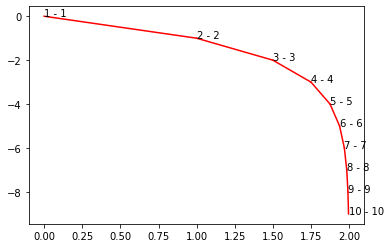

In [ ]:
tree = BinaryTree()
for i in [1,2,3,4,5,6,7,8,9,10]: tree.add(i, i)
tree.draw()

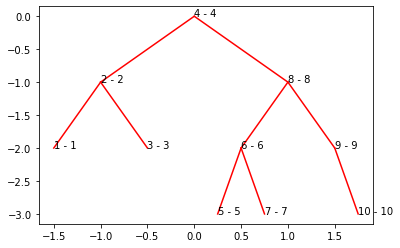

In [ ]:
tree = BinaryTree()
for i in [1,2,3,4,5,6,7,8,9,10]: tree.add_avl(i, i)
tree.draw()

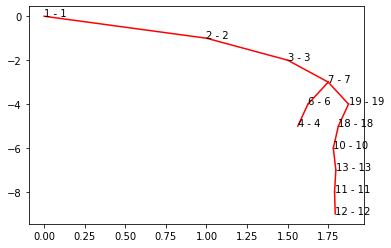

In [ ]:
tree = BinaryTree()
for i in [ 1,  2,  1,  3,  7, 19, 19, 18, 10,  6,  1, 13, 11,  2,  6, 10, 11, 4, 12, 18]: tree.add(i, i)
tree.draw()

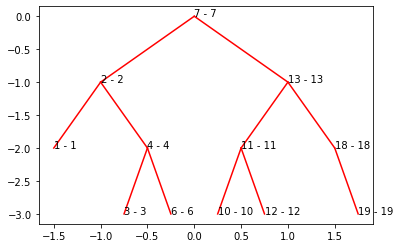

In [ ]:
tree = BinaryTree()
for i in [ 1,  2,  1,  3,  7, 19, 19, 18, 10,  6,  1, 13, 11,  2,  6, 10, 11, 4, 12, 18]: tree.add_avl(i, i)
tree.draw()

Try "recursive inheritance"

In [ ]:
# export
class AVLTreeNode(TreeNode):
    def __init__(self, key, val):
        super().__init__(key, val)
        
    def newnode(self, key, val):
        return AVLTreeNode(key, val)

    def add(self, key, val):
        self = super().add(key, val)
        return self._rebalance()

In [ ]:
# export
class AVLBinaryTree:
    def __init__(self, root=None):
        self.root = root
        
    def add(self, key, val):
        if self.root: self.root = self.root.add(key, val)
        else:         self.root = AVLTreeNode(key, val)
    
    def draw(self):
        if self.root: self.root.draw(0, 0, 1, 1)

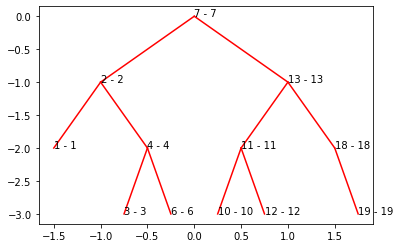

In [ ]:
tree = AVLBinaryTree()
for i in [ 1,  2,  1,  3,  7, 19, 19, 18, 10,  6,  1, 13, 11,  2,  6, 10, 11, 4, 12, 18]: 
    tree.add(i, i)
tree.draw()

# Build

In [ ]:
build_notebook()

<IPython.core.display.Javascript object>

Converted module17.ipynb.
